In [1]:
import os
os.makedirs('images', exist_ok=True)

In [2]:
import pandas as pd

df = pd.read_csv('data/covid_19_india.csv')
print(df.head())
print(df.info())
print(df.describe())

   Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----

In [3]:
df.rename(columns={'State/UnionTerritory': 'State', 'Confirmed': 'ConfirmedCases'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.fillna(0, inplace=True)
df.drop_duplicates(inplace=True)

/var/folders/97/t04by57d43q2psxr1zpgv_cr0000gn/T/ipykernel_2186/3722270690.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [4]:
statewise = df.groupby('State').max()[['ConfirmedCases', 'Deaths', 'Cured']]
statewise['MortalityRate'] = (statewise['Deaths'] / statewise['ConfirmedCases']) * 100
print(statewise.sort_values('ConfirmedCases', ascending=False).head(10))


                ConfirmedCases  Deaths    Cured  MortalityRate
State                                                         
Maharashtra            6363442  134201  6159676       2.108937
Maharashtra***         6229596  130753  6000911       2.098900
Kerala                 3586693   18004  3396184       0.501967
Karnataka              2921049   36848  2861499       1.261465
Karanataka             2885238   36197  2821491       1.254559
Tamil Nadu             2579130   34367  2524400       1.332504
Andhra Pradesh         1985182   13564  1952736       0.683262
Uttar Pradesh          1708812   22775  1685492       1.332797
West Bengal            1534999   18252  1506532       1.189056
Delhi                  1436852   25068  1411280       1.744647


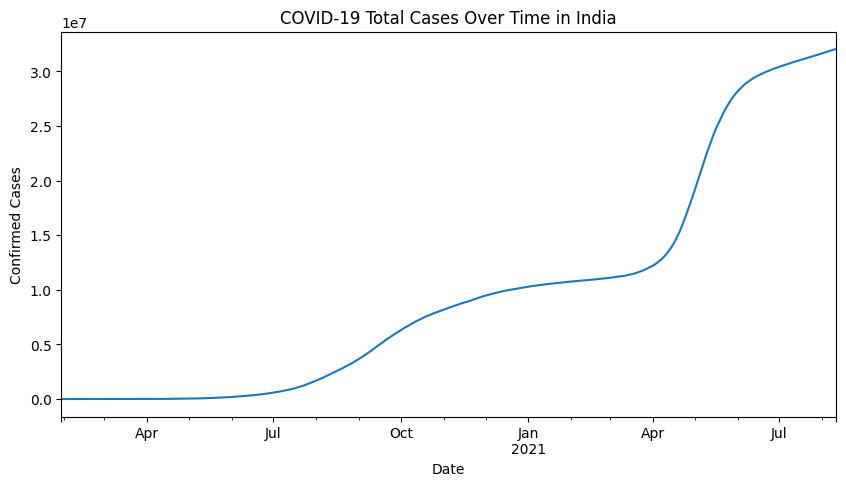

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

df.groupby('Date')['ConfirmedCases'].sum().plot(figsize=(10,5))
plt.title("COVID-19 Total Cases Over Time in India")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.savefig('images/total_case.png', dpi=300, bbox_inches='tight')
plt.show()

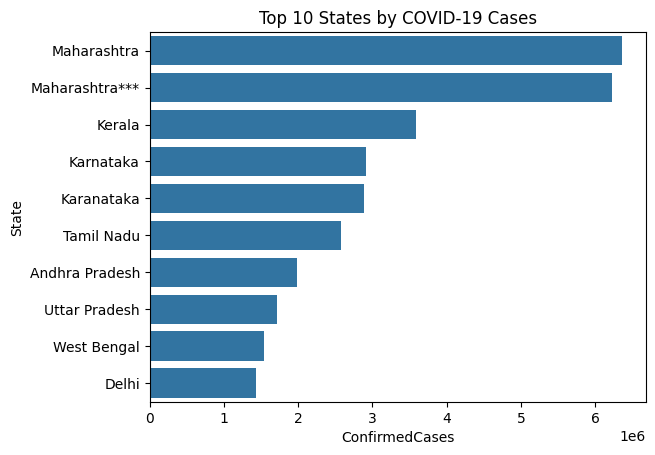

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns

top_states = statewise.sort_values('ConfirmedCases', ascending=False).head(10)
sns.barplot(x=top_states['ConfirmedCases'], y=top_states.index)
plt.title("Top 10 States by COVID-19 Cases")
plt.savefig('images/top_10.png', dpi=300, bbox_inches='tight')
plt.show()

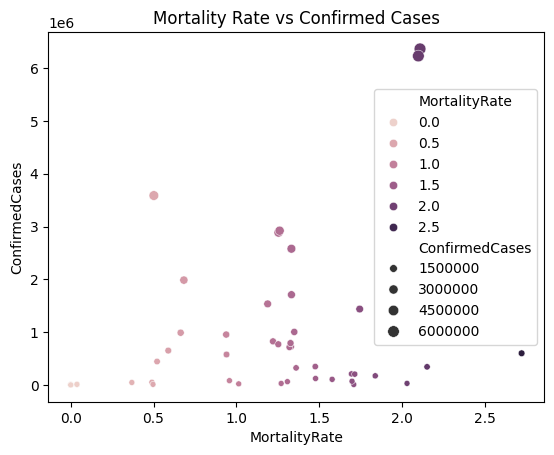

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.scatterplot(data=statewise, x='MortalityRate', y='ConfirmedCases', size='ConfirmedCases', hue='MortalityRate')
plt.title("Mortality Rate vs Confirmed Cases")
plt.savefig('images/mortality_confirmed.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# Plotting with Plotly
import plotly.express as px
fig = px.line(df.groupby('Date')['ConfirmedCases'].sum().reset_index(),
              x='Date', y='ConfirmedCases', title='COVID-19 Trend in India')
# fig.show()
fig.show(renderer="browser")

